In [277]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import visuals as vs
from sklearn.metrics import r2_score
from pandas import DataFrame
#Refer: http://scikit-learn.org/stable/modules/multiclass.html#multioutput-classification

In [182]:
features = pd.read_csv("F:\\ML\\MultiTarget\\features.csv")
target   = pd.read_csv("F:\\ML\\MultiTarget\\targets.csv")

In [365]:
features.describe()

,class_count,indiv_count,obj_property_count,dataproperty_count,datatypes_count,Cyclic Cls,HC_Cohesion,HC_MAX_DEPTH,HC_Max_Sibling,HC_Avg_Sibling,...,ReflexiveObjectProperty,InverseFunctionalObjectProperty,EquivalentDataProperties,SameIndividual,EquivalentObjectProperties,SubDataPropertyOf,FunctionalDataProperty,IrrefexiveObjectProperty,AsymmetricObjectProperty,DisjointObjectProperties
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.00000,1087.00000,...,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,19790.656854,2319.784729,136.709292,12.000920,1.167433,0.925303,0.031942,12.794848,2988.75897,61.71378,...,0.002019,0.031517,0.022141,0.397500,0.054381,0.278431,0.133343,0.001426,0.000677,0.000735
std,48360.231675,17387.201917,465.429389,93.531231,2.346096,3.356650,0.058399,18.559676,7109.03216,977.09681,...,0.028081,0.377945,0.150078,2.210209,0.336670,1.307387,0.989180,0.020908,0.009686,0.015831
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,131.500000,0.000000,9.000000,0.000000,0.000000,0.000000,0.001000,4.000000,11.00000,2.65800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3008.000000,9.000000,53.000000,0.000000,0.000000,0.000000,0.004000,10.000000,53.00000,3.50000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22006.500000,100.000000,163.000000,3.000000,2.000000,0.132000,0.038500,14.500000,642.50000,4.83300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,903617.000000,292198.000000,11510.000000,2287.000000,29.000000,33.515000,0.618000,143.000000,41087.00000,24422.00000,...,0.784000,9.489000,3.103000,46.937000,9.709000,20.918000,16.821000,0.563000,0.235000,0.453000


In [314]:
print(features.shape, target.shape)


(1087, 102) (1087, 14)


C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


,Konclude_status,More_status,Hermit_status,Fact++_status,TrOWL_status,JFact_status,Konclude_RT,More_RT,Hermit_RT,Fact++_RT,TrOWL_RT,JFact_RT
Konclude_status,1.000000,0.350581,0.443471,0.317099,0.124881,0.287879,-0.072540,-0.012545,-0.082954,0.023812,0.446498,-0.072261
More_status,0.350581,1.000000,0.439341,0.425485,0.373442,0.232722,0.233201,-0.096673,-0.106386,-0.040930,0.225899,-0.068717
Hermit_status,0.443471,0.439341,1.000000,0.588483,0.368749,0.608683,0.401162,0.100683,-0.035567,0.052492,0.302517,-0.132576
Fact++_status,0.317099,0.425485,0.588483,1.000000,0.461096,0.599105,0.382411,0.194471,0.072026,-0.127355,0.309125,-0.139755
TrOWL_status,0.124881,0.373442,0.368749,0.461096,1.000000,0.314746,0.218857,0.155750,0.134286,-0.071772,0.042453,-0.116204
JFact_status,0.287879,0.232722,0.608683,0.599105,0.314746,1.000000,0.400691,0.221871,0.278750,0.155299,0.348356,-0.240495
Konclude_RT,-0.072540,0.233201,0.401162,0.382411,0.218857,0.400691,1.000000,0.147875,0.071052,0.023975,0.098336,-0.032871
More_RT,-0.012545,-0.096673,0.100683,0.194471,0.155750,0.221871,0.147875,1.000000,0.408601,0.043939,0.111813,0.064600
Hermit_RT,-0.082954,-0.106386,-0.035567,0.072026,0.134286,0.278750,0.071052,0.408601,1.000000,0.094744,0.039949,0.063199
Fact++_RT,0.023812,-0.040930,0.052492,-0.127355,-0.071772,0.155299,0.023975,0.043939,0.094744,1.000000,0.065678,0.239563


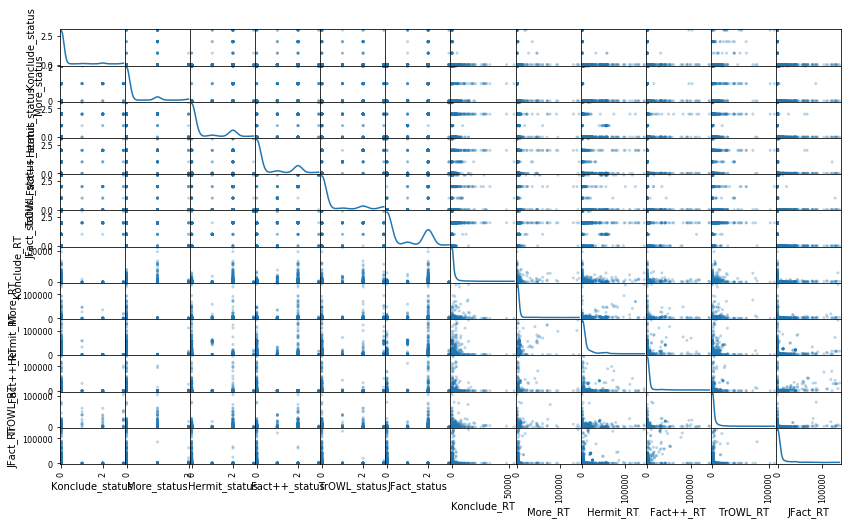

In [212]:
target_data = (df_lbl_enc(target[target_cols]))
pd.scatter_matrix(target_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
target_data.corr(method='pearson', min_periods=1)

In [288]:
#pd.concat([pd.DataFrame(["H"], columns=['name']) for i in range(5)], ignore_index=True)
col1.split('_')[0]

'JFact'

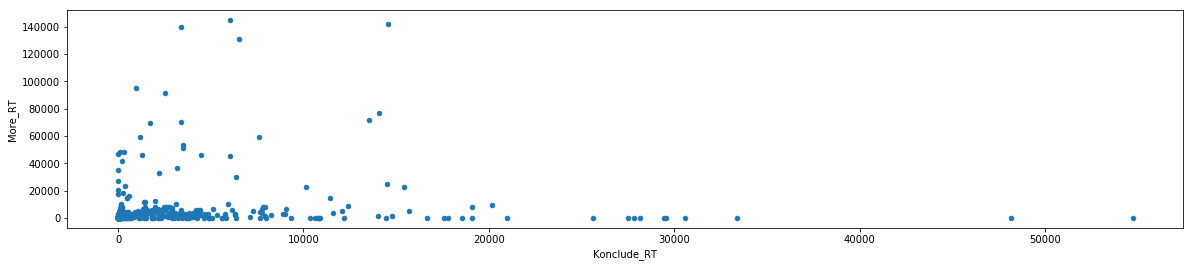

In [364]:
f = df_lbl_enc(target)
f.plot(kind='scatter', figsize=(20,4), x = 'Konclude_RT', y='More_RT')

In [371]:
from sklearn import preprocessing

def df_lbl_enc(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            df[c] = lbl.fit_transform(df[c])
            #print(c)
    return df

from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.20, random_state=42)
'''
train_features = features.loc[features['Set'] == "Train"] 
test_features = features.loc[features['Set'] == "Test"] 
train_target  = target.loc[target['Set'] == "Train"] 
test_target   = target.loc[target['Set'] == "Test"]
'''
features_cols = [c for c in features if c not in ['Set','Profile']]
'''
features_cols = ['expressivity', 'class_count', 'Axioms_count', 'HC_Avg_Sibling', 'Tbox_size', 'AxiomsLogical_count',
 'TransitiveObjectProperty', 'SubClassOf', 'OntoCCDensity', 'PCD', 'HC_MAX_DEPTH', 'obj_property_count', 
 'Rbox_size', 'C_Tangledness', 'HasSelf', 'AvgNesting', 'HC_Cohesion', 'Tbox_ratio', 'Rbox_ratio', 'indiv_count',
 'ClassAssertion', 'EquivalentClasses', 'SymmetricObjectProperty'] 



features_cols = ['ExactCardinality', 'Cyclic Cls', 'HC_Avg_Sibling', 'HP_Avg_Sibling', 'obj_property_count', 
                 'HC_Max_Sibling', 'DisjointClasses', 'class_count', 'NPCD', 'Abox_size', 'HP_Cohesion', 'GCI', 
                 'ClassAssertion', 'C_Tangledness', 'AxiomsLogical_count', 'Onto_Cohesion', 'SubPropertyChainOf',
                 'P_Tangledness', 'Axioms_count', 'SubClassOf', 'PCD', 'TransitivePropRatio', 'Tbox_size', 'indiv_count',
                 'Existentiel', 'Tbox_ratio', 'AvgNesting', 'expressivity', 'IndivDiffRatio', 'OntoCCDensity', 
                 'C_MaxTangledness', 'Rbox_ratio', 'SubObjectPropertyOf', 'Intersection', 'GCI_Ratio']
'''

target_cols = [c for c in target if c not in ['Set','Profile']]

train_features = df_lbl_enc(train_features[features_cols])
test_features  = df_lbl_enc(test_features[features_cols])
train_target   = df_lbl_enc(train_target[target_cols])[['Konclude_RT','More_RT', 'Hermit_RT', 'Fact++_RT', 'TrOWL_RT', 'JFact_RT']]

test_target    = df_lbl_enc(test_target[target_cols])[['Konclude_RT','More_RT', 'Hermit_RT', 'Fact++_RT', 'TrOWL_RT', 'JFact_RT']]

#clf1 = RandomForestRegressor(100).fit(train_features, train_target)
#print("Score Random forest All Features all Target", clf1.score(test_features,test_target))
#print("R2 Score Random forest All Features all Target", r2_score(test_target,clf1.predict(test_features)))


col = train_target.columns
rfc = DataFrame(columns=['Target', 'score'])
mrfc = DataFrame(columns=['Target', 'score'])

clf1 = forest.fit(train_features, train_target)
rfc.loc[0,"Target"] = "All Target"
rfc.loc[0,"score"] = clf1.score(test_features,test_target) #r2_score(test_target_c,clf1.predict(test_features))
pred1 = clf1.predict(test_features)
clf2 = MultiOutputRegressor(forest, n_jobs=-1).fit(train_features, train_target)
mrfc.loc[0,"Target"] = "All Target"
mrfc.loc[0,"score"] = clf2.score(test_features,test_target) #r2_score(test_target_c,clf2.predict(test_features))
pred1 = clf2.predict(test_features)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
clf3 = neigh.fit(train_features, train_target)
knnpred = clf3.predict(test_features)
print("KNN",clf3.score(test_features,test_target))

'''
for i in range(0,6):
    print(col[i],col[i+6])
    col1 = col[i]
    col2 = col[i+6]
    i=i+1
    train_target_c   = df_lbl_enc(train_target[target_cols])[[col2]]
    test_target_c    = df_lbl_enc(test_target[target_cols])[[col2]]
    forest = RandomForestRegressor(n_estimators=70, random_state=42)
    
    clf1 = forest.fit(train_features, train_target_c)
    rfc.loc[i,"Target"] = col1.split('_')[0]
    rfc.loc[i,"score"] = r2_score(test_target_c,clf1.predict(test_features))
    
    #print("RandomForest: ",clf1.score(test_features,test_target_c),r2_score(test_target_c,clf1.predict(test_features)))
    #rfc.append({'Target':col1.split('_')[0], 'r2score':r2_score(test_target_c,clf1.predict(test_features))}, ignore_index=True)
    
    clf2 = MultiOutputRegressor(forest, n_jobs=-1).fit(train_features, train_target_c)
    #mrfc.append({'Target':col1.split('_')[0], 'r2score':r2_score(test_target_c,clf2.predict(test_features))}, ignore_index=True)
    mrfc.loc[i,"Target"] = col1.split('_')[0]
    mrfc.loc[i,"score"] = r2_score(test_target_c,clf2.predict(test_features))
    #print("Multiple Forest Regression:",clf2.score(test_features,test_target_c), r2_score(test_target_c,clf2.predict(test_features)))
    print("--------------------------------------")
    
#Konclude_RT	More_RT	Hermit_RT	Fact++_RT	TrOWL_RT	JFact_RT
'''
#test_cols = [c for c in test_features if c not in ['Set','Profile']]
final = DataFrame(columns=['Target','RF'])
final['Target'] = rfc['Target']
final['RF'] = rfc['score']
final['MRF'] = mrfc['score']
print(final)

C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: multiclass-multioutput is not supported

In [367]:
test_target[['Konclude_RT','More_RT', 'Hermit_RT', 'Fact++_RT', 'TrOWL_RT', 'JFact_RT']].head()

,Konclude_RT,More_RT,Hermit_RT,Fact++_RT,TrOWL_RT,JFact_RT
746,104,4686,57036,258,0,0
56,0,0,0,0,47113,0
684,90,2550,39186,315,0,0
896,2,312,106,27,129,138
723,2,359,352,29,46,147


,Konclude,More,Hermit,Fact++,TrOWL,JFact
0,8,593,469,0,192,0
1,3,297,0,0,0,0
2,9,397,280,59,0,0
3,8,593,469,0,192,0
4,64,1773,3414,0,0,0


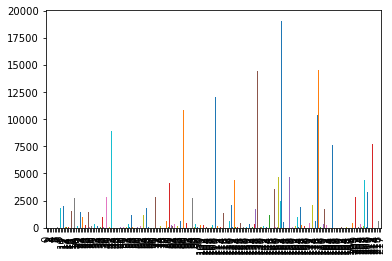

In [374]:
p =pd.DataFrame(knnpred,columns = ['Konclude','More' , 'Hermit', 'Fact++', 'TrOWL', 'JFact'])
test_target['Konclude_RT'].plot(kind='bar')
p['Konclude'].plot(kind='bar')
p.head()

#f.plot(kind='scatter', figsize=(20,4), x = 'Konclude_RT', y='More_RT')

In [154]:
def accuracy_score_hny(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"

In [232]:
print(train_features.shape, train_target.shape, test_features.shape, test_target.shape)

(869, 23) (869, 12) (218, 23) (218, 12)


In [243]:
clf1 = RandomForestRegressor(100).fit(train_features, train_target)
print(clf1.score(test_features,test_target))

-0.727998718449


In [234]:
print(clf1.predict(test_features).shape, test_target.shape)
print(r2_score(test_target,clf1.predict(test_features)))

(218, 12) (218, 12)
-0.214447343209


C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [235]:
#rfvalues = clf1.predict(test_features)
p = clf1.predict(test_features)
print(p.shape)

(218, 12)


In [236]:
p =pd.DataFrame(clf1.predict(test_features),columns = ['ks','krt'])
test_target['Konclude_RT'].plot()
p['krt'].plot()

ValueError: Shape of passed values is (12, 218), indices imply (2, 218)

In [209]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.multioutput import MultiOutputClassifier
forest = RandomForestRegressor(n_estimators=60, random_state=1)
multi_target_forest = MultiOutputRegressor(forest, n_jobs=-1)
print(multi_target_forest.fit(train_features, train_target).score(test_features,test_target))
print(r2_score(test_target,multi_target_forest.predict(test_features)))

-0.479744873284
-0.690830054061


C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


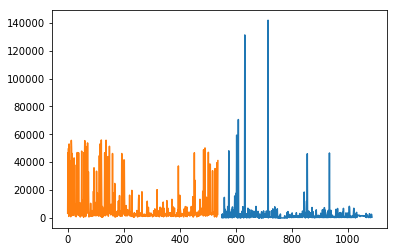

In [199]:
mlvalues = multi_target_forest.predict(test_features)
p =pd.DataFrame(multi_target_forest.predict(test_features),columns = ['ks','krt'])
test_target['More_RT'].plot()
p['krt'].plot()

In [84]:
test_target.describe()

,Konclude_status,Konclude_RT
count,537.000000,537.000000
mean,0.115456,1208.778399
std,0.501568,4295.062767
min,0.000000,0.000000
25%,0.000000,7.000000
50%,0.000000,73.000000
75%,0.000000,425.000000
max,3.000000,54727.000000


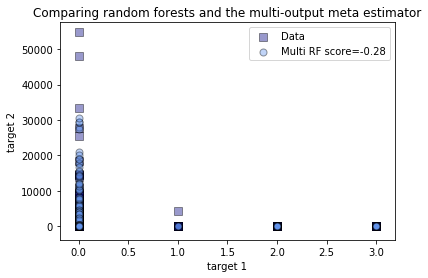

In [139]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(test_target.values[:, 0], test_target.values[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(train_target.values[:, 0], train_target.values[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % multi_target_forest.score(test_features, test_target))


plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

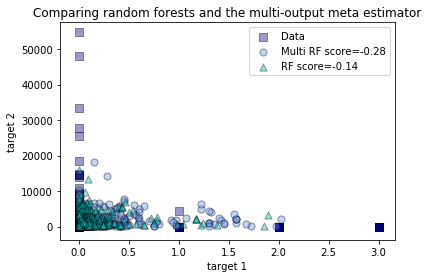

In [140]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(test_target.values[:, 0], test_target.values[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(mlvalues[:, 0], mlvalues[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % multi_target_forest.score(test_features, test_target))
plt.scatter(rfvalues[:, 0], rfvalues[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % clf1.score(test_features, test_target))


plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

In [180]:
features = train_features.columns.tolist()
importances = clf1.feature_importances_
p = np.vstack((features,importances))

df = pd.DataFrame(p.transpose(),columns=['name','importance'])
dfsorted = df.sort_values(['importance'], ascending=False)
dfsorted['name']=df['name'].astype(str)
dfsorted['importance']=df['importance'].astype(float)

print(dfsorted.dtypes)

best_col = dfsorted.loc[dfsorted['importance'] > 0.01]

print(best_col['name'].tolist())

name           object
importance    float64
dtype: object
['expressivity', 'class_count', 'Axioms_count', 'HC_Avg_Sibling', 'Tbox_size', 'AxiomsLogical_count', 'TransitiveObjectProperty', 'SubClassOf', 'OntoCCDensity', 'PCD', 'HC_MAX_DEPTH', 'obj_property_count', 'Rbox_size', 'C_Tangledness', 'HasSelf', 'AvgNesting', 'HC_Cohesion', 'Tbox_ratio', 'Rbox_ratio', 'indiv_count', 'ClassAssertion', 'EquivalentClasses', 'SymmetricObjectProperty']


KeyError: '[99 82 97 66 98 91 24 59 90 57 70 68 61 52 19 65 23 95 67 53 69 45 56 42 58\n 51 63 96 80 93 87  5 60 55 49 75 85 46 84 22 92 16  4 94 43 15 88 62 39 81\n 89 38 21 73 17 86 37 76 41 77 31 71 29  7 36  8 32 74  0 44 12 48 50 83 47\n 27 40 26 14  2 72 34  1 25 33 64 20 13 30  3 79 11 35 10 18 28 78  6  9 54] not in index'

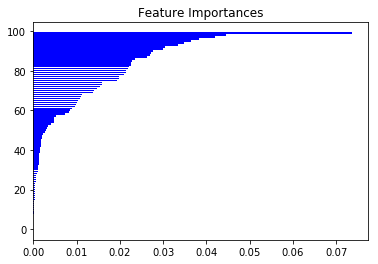

In [89]:

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()